<a href="https://colab.research.google.com/github/julianamo93/SparkLight-ML/blob/main/SparkLight_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Global Solution - 2TDSZ-2024 Green Energy**

   **Integrantes**:
*   Juliana Moreira - RM 554113
*   Kevin Nobre - RM 552590
*   Sabrina Couto - RM 552728



**Descritivo** - Modelo ML de classificação de consumo de energia, verificando os dados de consumo ao longo das décadas, criando um estudo de consumo e comportamento do usuário para que o modelo entenda que tipo de consumo vamos ter atualmente analisando os últimos períodos.
*   **Dataset**: Hourly Energy Consumption
*   **Dados utilizados**: pjm_hourly_est.csv - reunindo todos os dados de carga combinada de todas as regiões e consumo estimado em Megawatts.
*   **Tamanho**: 12.409 KB
*   **Objetivo**: obter informações de consumo de energia por hora e por ano em cada região, e criar um modelo que processe o consumo anual de acordo com as horas de consumo e pelo tempo estimado.



# **SparkLight.ML**
*   Modelo de ML criado para analisar e prever o consumo energético de forma precisa, abordando a imprevisibilidade da demanda em comunidades remotas.


In [98]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score


# **EDA - ANálise Exploratória de Dados**

Iniciando nossa análise exploratória de Dados (EDA), onde vamos entender as colunas e identificar dados faltantes.


In [99]:
data = pd.read_csv('pjm_hourly_est.csv')
print(data.head())

              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
2  1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
3  1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
4  1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   

   PJME  PJMW  PJM_Load  
0   NaN   NaN   29309.0  
1   NaN   NaN   28236.0  
2   NaN   NaN   27692.0  
3   NaN   NaN   27596.0  
4   NaN   NaN   27888.0  


In [100]:
type(data)

pandas.core.frame.DataFrame

In [101]:
# visualização das primeiras linhas
data.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [102]:
# visualização das últimas linhas
data.tail()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
178261,2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


In [103]:
# linhas e colunas de todo o DF
data.shape

(178262, 13)

# **Tratando Dados NaN**
*   Observamos que o dataset tem uma certa quantidade de NaN, então vamos tratar essas linhas e colunas.


In [104]:
# Convertendo a coluna 'Datetime' para o formato de data
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# Verifique a conversão para garantir que não há problemas
print(data['Datetime'].head())

# Preencher valores NaN nas colunas numéricas com a média
# Primeiro, selecionamos apenas as colunas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Preencher NaN com a média nas colunas numéricas
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verifique se há NaN restantes
print(data.isnull().sum())

0   1998-12-31 01:00:00
1   1998-12-31 02:00:00
2   1998-12-31 03:00:00
3   1998-12-31 04:00:00
4   1998-12-31 05:00:00
Name: Datetime, dtype: datetime64[ns]
Datetime    0
AEP         0
COMED       0
DAYTON      0
DEOK        0
DOM         0
DUQ         0
EKPC        0
FE          0
NI          0
PJME        0
PJMW        0
PJM_Load    0
dtype: int64


In [105]:
# estatísticas descritivas dos dados
data.describe()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,178262,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000,178262.000000
mean,2008-06-01 15:46:51.203734016,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
min,1998-04-01 01:00:00,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,2003-05-02 09:15:00,14453.000000,11420.152112,1888.000000,3105.096486,9917.000000,1539.000000,1464.218423,7792.159064,11701.682943,28578.000000,5083.000000,29766.427408
50%,2008-06-01 16:30:00,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
75%,2013-07-03 00:45:00,16185.000000,11420.152112,2138.000000,3105.096486,11248.750000,1716.000000,1464.218423,7792.159064,11701.682943,34460.000000,6042.000000,29766.427408
max,2018-08-03 00:00:00,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000
std,NaN,2137.402921,1407.273028,324.484173,341.390865,1948.857667,246.604696,191.058977,790.622951,1357.948390,5837.191243,877.600755,2512.902067


In [106]:
# Nomes das colunas
data.columns

Index(['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC',
       'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

In [107]:
# verificando informações básicas -  formato dos dados e das colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  178262 non-null  datetime64[ns]
 1   AEP       178262 non-null  float64       
 2   COMED     178262 non-null  float64       
 3   DAYTON    178262 non-null  float64       
 4   DEOK      178262 non-null  float64       
 5   DOM       178262 non-null  float64       
 6   DUQ       178262 non-null  float64       
 7   EKPC      178262 non-null  float64       
 8   FE        178262 non-null  float64       
 9   NI        178262 non-null  float64       
 10  PJME      178262 non-null  float64       
 11  PJMW      178262 non-null  float64       
 12  PJM_Load  178262 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 17.7 MB
None


In [108]:
# selecionando dados de uma coluna (formato Series)
serie = data['DOM']
serie

,DOM
0,10949.203625
1,10949.203625
2,10949.203625
3,10949.203625
4,10949.203625
...,...
178257,18418.000000
178258,18567.000000
178259,18307.000000
178260,17814.000000


Preenchemos os dados NaN com a média das colunas numéricas para podermos criar consistência nos nossos dados.

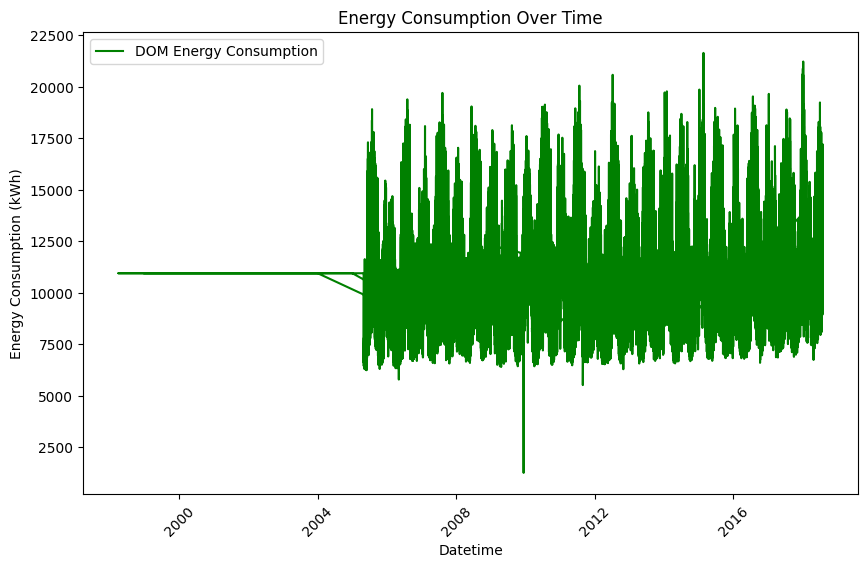

In [109]:
import matplotlib.pyplot as plt

# Plotar a série de consumo de energia
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['DOM'], label='DOM Energy Consumption', color='green')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [110]:
# Seleção dos dados de uma coluna (formato Data Frame)
df = data[['DOM']]
df

,DOM
0,10949.203625
1,10949.203625
2,10949.203625
3,10949.203625
4,10949.203625
...,...
178257,18418.000000
178258,18567.000000
178259,18307.000000
178260,17814.000000


In [111]:
data.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29309.0
1,1998-12-31 02:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,28236.0
2,1998-12-31 03:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,27692.0
3,1998-12-31 04:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,27596.0
4,1998-12-31 05:00:00,15499.513717,11420.152112,2037.85114,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,27888.0


In [112]:
# Cálculo de média aritmética dos valores de uma coluna
media = data['DOM'].mean()
media

10949.203625128024

In [113]:
# Cálculo de mediana dos valores de uma coluna
mediana = data['DOM'].median()
mediana

10949.203625128024

In [114]:
# Cálculo do desvio padrão dos valores de uma coluna
desvio_padrao = data['DOM'].std()
desvio_padrao

1948.8576666252648

In [115]:
# Dados de uma coluna no formato Numpy Array (Vetor)
vetor = data['DOM'].values
vetor

array([10949.20362513, 10949.20362513, 10949.20362513, ...,
       18307.        , 17814.        , 17428.        ])

# **Reestruturando os Dados com melt para um gráfico de linhas**

*   Vamos reestruturar o df para um formato longo, usando pandas.melt, onde cada coluna de consumo se torna uma categoria, facilitando a plotagem com Seaborn.

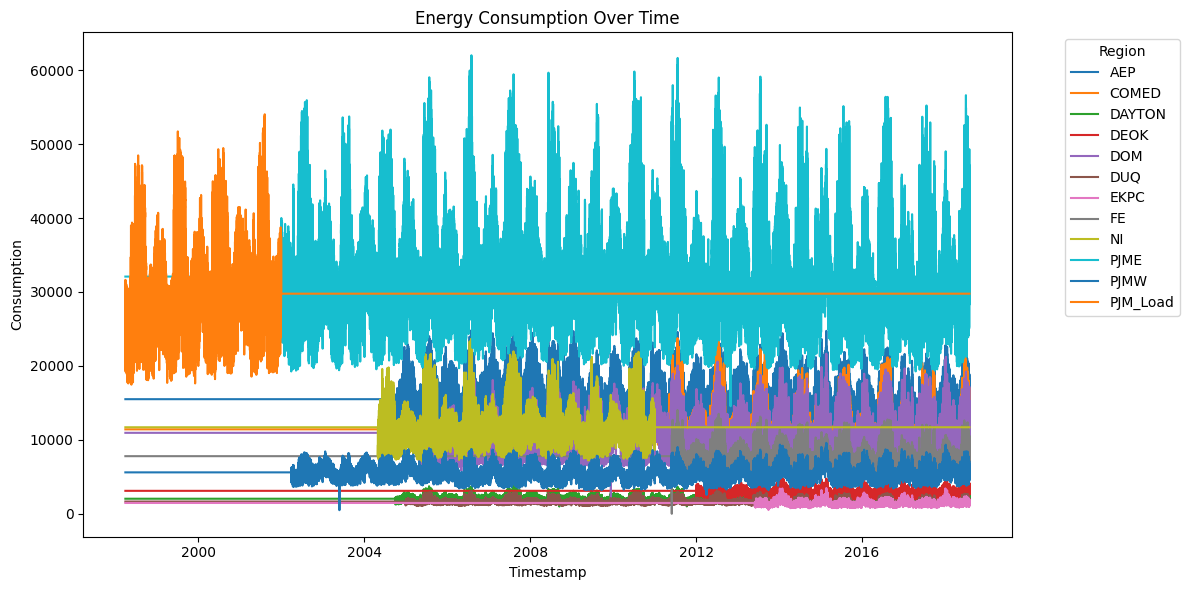

In [116]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que os dados estejam em formato datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Transformar os dados em formato longo (melt)
melted_data = data.melt(id_vars=['Datetime'],
                        value_vars=['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ',
                                    'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
                        var_name='Region',
                        value_name='Consumption')

# Plotando com Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, x='Datetime', y='Consumption', hue='Region', palette='tab10')
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **Reduzindo Dados para Maior Legibilidade**

*   Como o gráfico anterior ficou um pouco poluído devido ao tamanho do dataset, vamos fazer uma amostragem de dados.


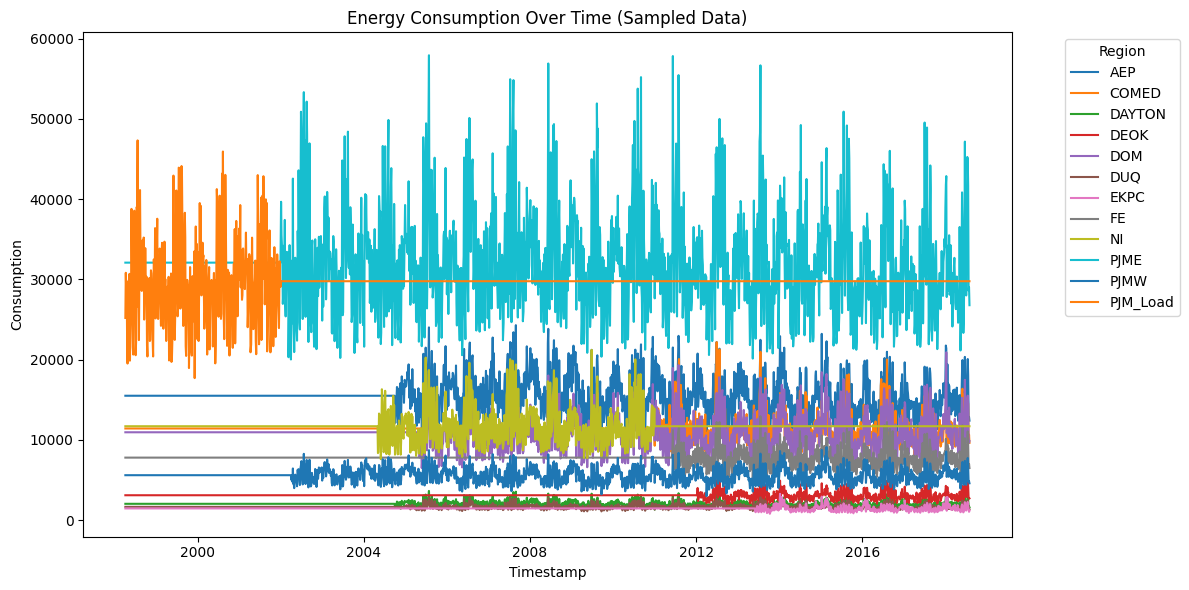

In [117]:
# Amostragem (1 de cada 100 pontos)
sampled_data = data.iloc[::100]

melted_sampled_data = sampled_data.melt(id_vars=['Datetime'],
                                        value_vars=['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ',
                                                    'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
                                        var_name='Region',
                                        value_name='Consumption')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_sampled_data, x='Datetime', y='Consumption', hue='Region', palette='tab10')
plt.title('Energy Consumption Over Time (Sampled Data)')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **Facetas para Visualização de Cada Dado Separadamente**

*   Vamos visualizar os dados e as regiões em gráficos separados, para uma melhor análise individualmente de cada região.

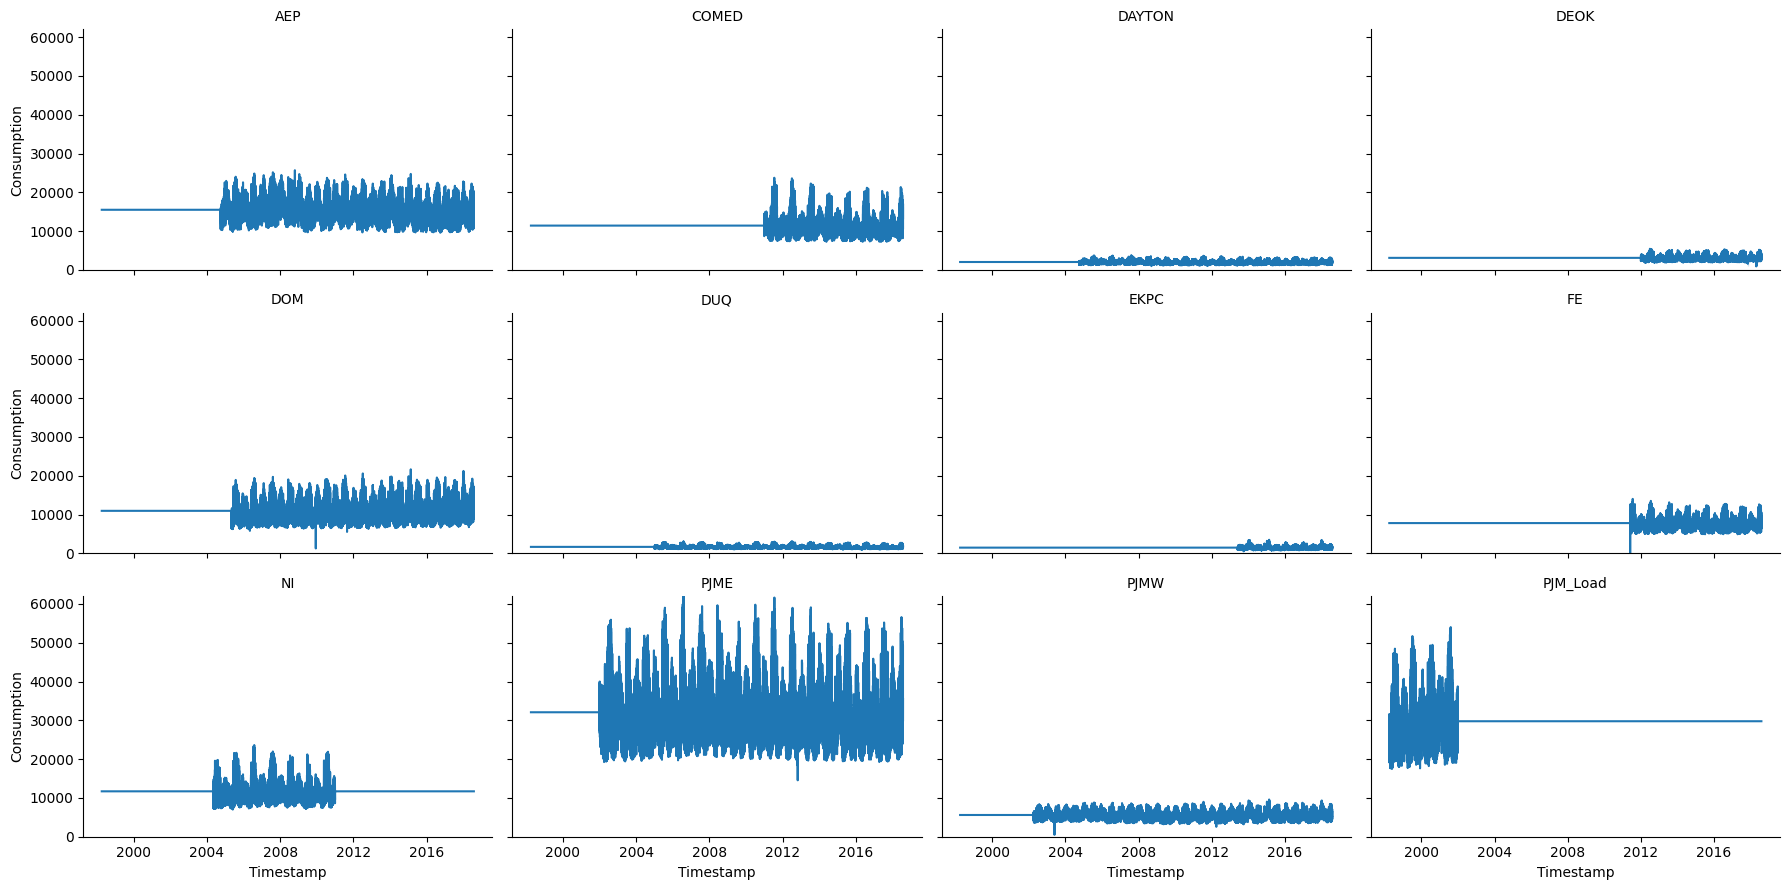

In [118]:
# Criando facetas
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o FacetGrid
g = sns.FacetGrid(melted_data, col="Region", col_wrap=4, height=3, aspect=1.5)

# Usando uma paleta de cores e mapeando as linhas
g.map_dataframe(sns.lineplot, x='Datetime', y='Consumption')

# Configurações adicionais
g.set_titles("{col_name}")
g.set_axis_labels("Timestamp", "Consumption")

# Usando uma paleta para as cores das linhas
g.set(ylim=(melted_data['Consumption'].min(), melted_data['Consumption'].max()))
plt.tight_layout()
plt.show()


# **Pré-Processamento**

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  178262 non-null  datetime64[ns]
 1   AEP       178262 non-null  float64       
 2   COMED     178262 non-null  float64       
 3   DAYTON    178262 non-null  float64       
 4   DEOK      178262 non-null  float64       
 5   DOM       178262 non-null  float64       
 6   DUQ       178262 non-null  float64       
 7   EKPC      178262 non-null  float64       
 8   FE        178262 non-null  float64       
 9   NI        178262 non-null  float64       
 10  PJME      178262 non-null  float64       
 11  PJMW      178262 non-null  float64       
 12  PJM_Load  178262 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 17.7 MB


In [120]:
data['AEP'].value_counts()

,count
AEP,
15499.513717,56989
15399.000000,33
14941.000000,33
15353.000000,32
15703.000000,32
...,...
21502.000000,1
22361.000000,1
22952.000000,1


In [121]:
data['AEP']

,AEP
0,15499.513717
1,15499.513717
2,15499.513717
3,15499.513717
4,15499.513717
...,...
178257,21089.000000
178258,20999.000000
178259,20820.000000
178260,20415.000000


In [122]:
# verificando se os dados da coluna AEP já são numéricos
print(data['AEP'].dtype)

float64


In [123]:
# Separação dos dados de entrada e dados de saída usando método .iloc
# Dados de entrada -------> Features ----> Variáveis independentes ---> X
# Exemplo
# Colunas "x, y, z" dimensões dos diamantes (as 3 últimas)
# X = dados[['x', 'y', 'z']]
X = data.iloc[:, -4:-1].values
# todas as linhas, colunas de -4 a -2 (-1 não é incluída)
X

array([[11701.68294269, 32080.22283065,  5602.37508903],
       [11701.68294269, 32080.22283065,  5602.37508903],
       [11701.68294269, 32080.22283065,  5602.37508903],
       ...,
       [11701.68294269, 42402.        ,  8238.        ],
       [11701.68294269, 40164.        ,  7958.        ],
       [11701.68294269, 38608.        ,  7691.        ]])

In [124]:
# Verificando as colunas selecionadas
selected_columns = data.columns[-4:-1]
print("Colunas selecionadas:", selected_columns)

# Comparar os valores no DataFrame com o array
print(data[selected_columns].head())
print(X[:5])  # Mostra as primeiras 5 linhas de X


Colunas selecionadas: Index(['NI', 'PJME', 'PJMW'], dtype='object')
             NI          PJME         PJMW
0  11701.682943  32080.222831  5602.375089
1  11701.682943  32080.222831  5602.375089
2  11701.682943  32080.222831  5602.375089
3  11701.682943  32080.222831  5602.375089
4  11701.682943  32080.222831  5602.375089
[[11701.68294269 32080.22283065  5602.37508903]
 [11701.68294269 32080.22283065  5602.37508903]
 [11701.68294269 32080.22283065  5602.37508903]
 [11701.68294269 32080.22283065  5602.37508903]
 [11701.68294269 32080.22283065  5602.37508903]]


In [125]:
# Dados de saída -----> Target ----> Variável dependente ---> y
y = data['DOM'].values  # usando a coluna numérica original
print(y)  # verificando os valores

[10949.20362513 10949.20362513 10949.20362513 ... 18307.
 17814.         17428.        ]


In [130]:
# Convertendo y para Pandas.Series
y_series = pd.Series(y)
print(y_series.dtypes)

float64


In [131]:
# Discretizar o consumo em faixas/categorias
bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['Muito Baixo', 'Baixo', 'Moderado', 'Alto', 'Muito Alto']
data['Consumo_Categ'] = pd.cut(data['AEP'], bins=bins, labels=labels)

# Atualizar `y` para as categorias
y = data['Consumo_Categ']

In [132]:
from sklearn.model_selection import train_test_split

# Separação em dados de treino e dados de teste
# Utilizando 20% dos dados para teste e uma SEED para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os tamanhos das divisões
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (142609, 3), X_test: (35653, 3)
y_train: (142609,), y_test: (35653,)


In [133]:
X_train

array([[ 9086.        , 28805.        ,  5141.        ],
       [11701.68294269, 34856.        ,  5596.        ],
       [ 9739.        , 25036.        ,  4927.        ],
       ...,
       [11701.68294269, 35453.        ,  5610.        ],
       [11701.68294269, 31800.        ,  5588.        ],
       [11701.68294269, 28932.        ,  5850.        ]])

In [134]:
# Tamanho do conjunto de treino
X_train.shape

(142609, 3)

# **Algoritmo**

In [164]:
# Instanciar o modelo
modeloKNN = KNeighborsClassifier()

In [171]:
# Treinar o modelo
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
y_pred = modeloKNN.predict(X_test)

In [173]:
y_test

,Consumo_Categ
67503,Moderado
45179,Baixo
20109,Baixo
19375,Baixo
175153,Baixo
...,...
42,Baixo
108183,Baixo
107035,Baixo
79598,Baixo


Avaliando o modelo com base na acurácia.

# **Matriz de Confusão e Relatório de Classificação**

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Previsões no conjunto de teste
y_pred = modeloKNN.predict(X_test)

# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação
print(classification_report(y_test, y_pred))

[[33942   354     7]
 [  482   841     0]
 [   18     0     9]]
              precision    recall  f1-score   support

       Baixo       0.99      0.99      0.99     34303
    Moderado       0.70      0.64      0.67      1323
 Muito Baixo       0.56      0.33      0.42        27

    accuracy                           0.98     35653
   macro avg       0.75      0.65      0.69     35653
weighted avg       0.97      0.98      0.98     35653



In [175]:
acuracia = 100 * accuracy_score(y_test, y_predict)
print(f'A acurácia do modelo baseado no algoritmo KNN é de: {acuracia: .2f} %')

A acurácia do modelo baseado no algoritmo KNN é de:  97.59 %


## **Validação de acurácia**

*   utilizando validação cruzada par verificar o desempenho consistente em diferentes subconjuntos dos dados, podendo identificar se houve overfitting.

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors=5)
# Usando validação cruzada para verificar o desempenho do modelo
scores = cross_val_score(modeloKNN, X, y, cv=5)  # cv=5 significa 5 folds
print(f"Acurácia média da validação cruzada: {scores.mean() * 100:.2f}%")

Acurácia média da validação cruzada: 96.65%


# **Avaliação de Desempenho - Métricas Adicionais**

*   Agora que já geramos a matriz de confusão e o relatório de classificação, é interessante considerarmos outras métricas para garantir uma avaliação robusta.

Acurácia do Modelo: 97.59%


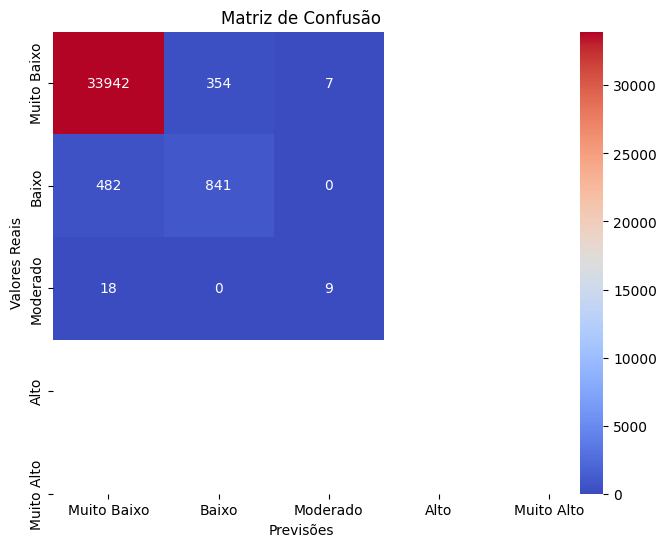

In [177]:
from sklearn.metrics import accuracy_score

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

# Plotando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()

Neste gráfico, visualizamos o desempenho da matriz de confusão.

### **Visualização dos Erros**

*   Vamos verificar se ele está errando em algum padrão específico, por questões de boas práticas.

In [178]:
# Comparar previsões com os reais
errors = y_pred != y_test
print(f"Número de erros: {errors.sum()}")

# Exemplo de alguns erros
print("Erros de Previsão (Real vs. Predito):")
for real, pred in zip(y_test[errors], y_pred[errors]):
    print(f"Real: {real}, Predito: {pred}")

Número de erros: 861
Erros de Previsão (Real vs. Predito):
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Baixo, Predito: Moderado
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Muito Baixo
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Moderado, Predito: Baixo
Real: Baixo, Predito: Moderado
Real: Mo

### **Ajuste de Hiperparâmetros com GridSearch**

*   Para melhorar o desempenho do modelo, vamos ajustar os hiperparâmetros do KNN usando GridSearch.

In [179]:
from sklearn.model_selection import GridSearchCV

# Parâmetros que queremos testar
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Instanciando o GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Treinando com o GridSearch
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Melhor modelo
modelo_tuneado = grid_search.best_estimator_

# Avaliando com os melhores parâmetros
y_pred_tuneado = modelo_tuneado.predict(X_test)
print(confusion_matrix(y_test, y_pred_tuneado))
print(classification_report(y_test, y_pred_tuneado))


Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
[[34005   296     2]
 [  505   818     0]
 [   22     0     5]]
              precision    recall  f1-score   support

       Baixo       0.98      0.99      0.99     34303
    Moderado       0.73      0.62      0.67      1323
 Muito Baixo       0.71      0.19      0.29        27

    accuracy                           0.98     35653
   macro avg       0.81      0.60      0.65     35653
weighted avg       0.98      0.98      0.98     35653



# **Deploy do Modelo**

*   Esta parte é a preparação para o deploy do nosso SparkLight ML, esta etapa seria a próxima após a criação do modelo, para que

In [180]:
# Treinando o modelo
modeloKNN.fit(X_train, y_train)

# Salvando o modelo
import joblib
joblib.dump(modeloKNN, 'modelo_knn.pkl')


['modelo_knn.pkl']

In [181]:
import joblib

# Salvar o modelo
joblib.dump(modeloKNN, 'modelo_knn.pkl')

# Carregar o modelo
modelo_carregado = joblib.load('modelo_knn.pkl')

# Fazer previsões com o modelo carregado
y_pred_carregado = modelo_carregado.predict(X_test)

## **Testando o Modelo**

In [182]:
modelo_carregado = joblib.load('modelo_knn.pkl')

# Fazer previsões
y_pred_carregado = modelo_carregado.predict(X_test)

# **Conclusão**

*   Nosso modelo SparkLight.ML foi criado para identificar e classificar o consumo de energia dos usuários ao longo das décadas, obtendo aproximadamente 96% de acurácia. Com o SparkLight.ML em ambiente de produção, poderíamos prever a média e o consumo de energia total de cada usuário, auxiliando no controle e na economia de energia dos próximos meses de consumo.